In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

### Reading the dataset

In [4]:
leads=pd.read_csv("C:/Users/vinee/Downloads/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Cleaning

In [5]:
## Checking for categorical columns having "Select" values

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
columns=list(leads.columns)

In [8]:
columns

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [9]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
for col_name in columns:
    leads.loc[(leads[col_name]=="Select"),[col_name]]=np.nan
    

In [11]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737.0,API,Olark Chat,No,No,0.0,0.0,0.0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728.0,API,Organic Search,No,No,0.0,5.0,674.0,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,Landing Page Submission,Direct Traffic,No,No,1.0,2.0,1532.0,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,Landing Page Submission,Direct Traffic,No,No,0.0,1.0,305.0,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681.0,Landing Page Submission,Google,No,No,1.0,2.0,1428.0,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   float64
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   float64
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   float64
 9   Page Views Per Visit                           9103 

In [13]:
### Checking percentage for missing values

In [14]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### Taking 40% missing values as the cut off, we will drop "How did you hear about X Education", "Lead Quality", "Lead Profile","City","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"

##### Removing "Tags" as it is prepared by the sales team and hence cant be used in predicting the probability outcomes.

In [15]:
leads.drop(columns=["How did you hear about X Education", "Lead Quality", "Lead Profile","City","Tags","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],inplace=True)

In [16]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   float64
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   float64
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   float64
 9   Page Views Per Visit                           9103 

In [17]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### The categorical columns from the leads dataset are- "Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Country","Specialization", "What is your current occupation", "What matters most to you in choosing a course", "Search", "Magazine" , "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content", "Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview","Last Notable Activity"    
                 
                          
           
            
   
 

In [18]:
cat_columns=["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Country","Specialization", "What is your current occupation", "What matters most to you in choosing a course", "Search", "Magazine" , "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content", "Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview","Last Notable Activity"]

In [19]:

### Identifying the value_counts for different levels in each categorical columns

for item in cat_columns:                      
    print("Value_counts in feature : %s" %(item))
    print(leads[item].value_counts(normalize=True))
    print("\n")
    

Value_counts in feature : Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


Value_counts in feature : Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
WeLearn              0.000109
Pay per Click Ads    0.000109
NC_EDM               0.000109
testone              0.000109
blog                 0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
Name: Lead Source, dtype: float64


Value_counts in feature : Do Not Email
No 

### Identifying column names which has very skewed distribution- "Do Not Email","Do Not Call","Country","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"

In [20]:
leads.drop(columns=["Do Not Email","Do Not Call","Country","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],inplace=True)

In [21]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   float64
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Converted                               9240 non-null   float64
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   float64
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          5860 non-null   object 
 10  What is your current occupation         6550 non-null   obje

In [22]:
### Finding value_counts in the remaining categorical columns

for item in ["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","Last Notable Activity","A free copy of Mastering The Interview"]:
    print("Value_counts in feature : %s" %(item))
    print(leads[item].value_counts(normalize=True))
    print("\n")

Value_counts in feature : Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


Value_counts in feature : Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
WeLearn              0.000109
Pay per Click Ads    0.000109
NC_EDM               0.000109
testone              0.000109
blog                 0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
Name: Lead Source, dtype: float64


Value_counts in feature : Last Activity
Em

In [23]:

### Defining a function to find Shannon's Entropy for each categorical column- this is used to check the balance in a 

### a particular feature. Shannon's Entropy closer to 1 will indicate that the data is balanced and hence "not very" skewed.


def balance(col):
    from collections import Counter
    from numpy import log
    n=len(col)
    classes=[(clas,float(count)) for clas,count in Counter(col).items()]
    k=len(classes)
    
    H=-sum([(count/n)*log((count/n)) for clas, count in classes]) 
    return H/log(k)

In [24]:
leads.loc[~(leads["Lead Origin"]=="Landing Page Submission"),["Lead Origin"]]="origin_others"

In [25]:
leads["Lead Origin"].value_counts(normalize=True)

Landing Page Submission    0.528788
origin_others              0.471212
Name: Lead Origin, dtype: float64

In [26]:
col=leads["Lead Origin"]
round(balance(col),2)         # A perfect Shannon Entropy indicating a balanced feature

1.0

In [27]:
leads.loc[~((leads["Lead Source"]=="Google") | (leads["Lead Source"]=="Direct Traffic") | (leads["Lead Source"]=="Olark Chat")),["Lead Source"]]="source_others"

In [28]:
leads["Lead Source"].value_counts(normalize=True)

Google            0.310390
Direct Traffic    0.275216
source_others     0.224459
Olark Chat        0.189935
Name: Lead Source, dtype: float64

In [29]:
col=leads["Lead Source"]
round(balance(col),2)          # A near perfect Shannon Entropy indicating a balanced feature

0.99

In [30]:
leads.loc[~((leads["Last Activity"]=="Email Opened") | (leads["Last Activity"]=="SMS Sent")),["Last Activity"]]="activity_others"

In [31]:
leads["Last Activity"].value_counts(normalize=True)

Email Opened       0.371970
activity_others    0.330952
SMS Sent           0.297078
Name: Last Activity, dtype: float64

In [32]:
col=leads["Last Activity"]
round(balance(col),2)          # A perfect Shannon Entropy indicating a balanced feature

1.0

In [33]:
leads.loc[((leads["Specialization"]=="Services Excellence") | (leads["Specialization"]=="E-Business") |(leads["Specialization"]=="Rural and Agribusiness") | (leads["Specialization"]=="Retail Management")),["Specialization"]]="specialization_others"

In [34]:
leads["Specialization"].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
specialization_others                0.046075
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Name: Specialization, dtype: float64

In [35]:
col=leads["Specialization"]
round(balance(col),2)

0.81

In [36]:
leads.loc[(leads["Specialization"]=="E-COMMERCE"),["Specialization"]]="specialization_others"
col=leads["Specialization"]
round(balance(col),2)

0.82

In [37]:
leads.loc[(leads["Specialization"]=="Hospitality Management"),["Specialization"]]="specialization_others"
col=leads["Specialization"]
round(balance(col),2)

0.83

In [38]:
leads.loc[(leads["Specialization"]=="Healthcare Management"),["Specialization"]]="specialization_others"
col=leads["Specialization"]
round(balance(col),2)

0.83

In [39]:
leads.loc[(leads["Specialization"]=="International Business"),["Specialization"]]="specialization_others"
col=leads["Specialization"]
round(balance(col),2)

0.84

In [40]:
leads.loc[(leads["Specialization"]=="Travel and Tourism"),["Specialization"]]="specialization_others"
col=leads["Specialization"]
round(balance(col),2)

0.85

In [41]:
leads.loc[(leads["Specialization"]=="Media and Advertising"),["Specialization"]]="specialization_others"
col=leads["Specialization"]   
round(balance(col),2)             ### This is the maximum entropy of feature "Specialization"

0.86

In [42]:
leads["Specialization"].value_counts(normalize=True)

specialization_others                0.211433
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Name: Specialization, dtype: float64

In [43]:
leads.loc[~((leads["What is your current occupation"]=="Unemployed") | (leads["What is your current occupation"]=="Working Professional") ),["What is your current occupation"]]="occupation_others"

In [44]:
col=leads["What is your current occupation"]
round(balance(col),2)     ### This is the maximum entropy of feature "What is your current occupation"

0.79

In [45]:
leads.loc[~((leads["Last Notable Activity"]=="Modified") | (leads["Last Notable Activity"]=="Email Opened") ),["Last Notable Activity"]]="activity_others"

In [46]:
col=leads["Last Notable Activity"]
round(balance(col),2)                    # A perfect Shannon Entropy indicating a balanced feature

1.0

In [47]:
leads["Last Notable Activity"].value_counts(normalize=True)

Modified           0.368723
activity_others    0.325325
Email Opened       0.305952
Name: Last Notable Activity, dtype: float64

In [48]:
col=leads["A free copy of Mastering The Interview"]
round(balance(col),2)

0.9

## In the above analysis, we checked our categorical columns and looked for distribution balance. We used Shanon's Entropy to find acceptable clubbing of categories in a categorical column. The value of Shannon Entropy approaching 1 is the most ideal case as it represents the most balanced data and shanon's entropy value approaching 0 shows the most nbalanced data.

## Therefore, final description of categorical columns in our dataset are-

In [49]:
for item in ["Lead Origin","Lead Source","Last Activity","Specialization","Last Notable Activity","What is your current occupation","A free copy of Mastering The Interview"]:
    print("Value_counts in feature : %s" %(item))
    print(leads[item].value_counts(normalize=True))
    print("\n")

Value_counts in feature : Lead Origin
Landing Page Submission    0.528788
origin_others              0.471212
Name: Lead Origin, dtype: float64


Value_counts in feature : Lead Source
Google            0.310390
Direct Traffic    0.275216
source_others     0.224459
Olark Chat        0.189935
Name: Lead Source, dtype: float64


Value_counts in feature : Last Activity
Email Opened       0.371970
activity_others    0.330952
SMS Sent           0.297078
Name: Last Activity, dtype: float64


Value_counts in feature : Specialization
specialization_others                0.211433
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Name: Specialization, dtype: float64


Value_counts in 

In [50]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              0.00
Specialization                            36.58
What is your current occupation            0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

## As we see specialization has high missing value percentage. Hence it can't be imputed. Therefore, we need to drop rows having null values in specialization

In [51]:
leads=leads[~leads["Specialization"].isnull()]

In [52]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 2 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             5860 non-null   object 
 1   Lead Number                             5860 non-null   float64
 2   Lead Origin                             5860 non-null   object 
 3   Lead Source                             5860 non-null   object 
 4   Converted                               5860 non-null   float64
 5   TotalVisits                             5799 non-null   float64
 6   Total Time Spent on Website             5860 non-null   float64
 7   Page Views Per Visit                    5799 non-null   float64
 8   Last Activity                           5860 non-null   object 
 9   Specialization                          5860 non-null   object 
 10  What is your current occupation         5860 non-null   obje

In [53]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.04
Total Time Spent on Website               0.00
Page Views Per Visit                      1.04
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Missing value Imputation with mean for "TotalVisits" and "Page Views Per Visit"

In [54]:
leads["TotalVisits"].describe()

count    5799.000000
mean        4.378169
std         5.361246
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [55]:
leads.loc[leads["TotalVisits"].isnull(),["TotalVisits"]]=4.378169

In [56]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      1.04
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [57]:
leads["Page Views Per Visit"].describe()

count    5799.000000
mean        3.023773
std         2.105207
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [58]:
leads.loc[leads["Page Views Per Visit"].isnull(),["Page Views Per Visit"]]=3.023773
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Final Dataset that can be taken further for Logistic Regression Analysis is as follows-

In [59]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,Landing Page Submission,Direct Traffic,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,occupation_others,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,Landing Page Submission,Direct Traffic,0.0,1.0,305.0,1.0,activity_others,specialization_others,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673.0,Landing Page Submission,Google,1.0,2.0,1640.0,2.0,Email Opened,Supply Chain Management,Unemployed,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624.0,Landing Page Submission,Direct Traffic,0.0,2.0,71.0,2.0,Email Opened,IT Projects Management,occupation_others,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616.0,origin_others,Google,0.0,4.0,58.0,4.0,Email Opened,Finance Management,occupation_others,No,Email Opened


### Since, "Lead Origin" and "A free copy of Mastering The Interview" are dichotomous variables, we need not create dummy variables for them. We can simply map them.

In [60]:
leads["Lead Origin"]=leads["Lead Origin"].apply(lambda x: 1 if x=="Landing Page Submission" else 0)

In [61]:
leads["Lead Origin"].head()

2    1
3    1
6    1
8    1
9    0
Name: Lead Origin, dtype: int64

In [62]:
leads["A free copy of Mastering The Interview"]=leads["A free copy of Mastering The Interview"].apply(lambda x: 1 if x=="Yes" else 0)

In [63]:
leads["A free copy of Mastering The Interview"].head()

2    1
3    0
6    0
8    1
9    0
Name: A free copy of Mastering The Interview, dtype: int64

#### For categorical variables with multiple levels, created dummy features (one-hot encoded)

In [64]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[["Lead Source", "Last Activity","Specialization","Last Notable Activity","What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [65]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Source_Google,Lead Source_Olark Chat,Lead Source_source_others,Last Activity_SMS Sent,Last Activity_activity_others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_specialization_others,Last Notable Activity_Modified,Last Notable Activity_activity_others,What is your current occupation_Working Professional,What is your current occupation_occupation_others
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727.0,1,Direct Traffic,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,occupation_others,1,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719.0,1,Direct Traffic,0.0,1.0,305.0,1.0,activity_others,specialization_others,Unemployed,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673.0,1,Google,1.0,2.0,1640.0,2.0,Email Opened,Supply Chain Management,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624.0,1,Direct Traffic,0.0,2.0,71.0,2.0,Email Opened,IT Projects Management,occupation_others,1,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9,af465dfc-7204-4130-9e05-33231863c4b5,660616.0,0,Google,0.0,4.0,58.0,4.0,Email Opened,Finance Management,occupation_others,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [66]:
### We can see that "Lead Number" is unique and hence can be dropped.

leads["Lead Number"].value_counts(normalize=True, ascending=False)  

599955.0    0.000171
643198.0    0.000171
641663.0    0.000171
658048.0    0.000171
608897.0    0.000171
              ...   
636201.0    0.000171
634478.0    0.000171
603436.0    0.000171
619821.0    0.000171
655360.0    0.000171
Name: Lead Number, Length: 5860, dtype: float64

In [67]:
leads.drop(columns=["Lead Number"], inplace=True)

In [68]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Source_Google,Lead Source_Olark Chat,Lead Source_source_others,Last Activity_SMS Sent,Last Activity_activity_others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_specialization_others,Last Notable Activity_Modified,Last Notable Activity_activity_others,What is your current occupation_Working Professional,What is your current occupation_occupation_others
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,Direct Traffic,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,occupation_others,1,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,1,Direct Traffic,0.0,1.0,305.0,1.0,activity_others,specialization_others,Unemployed,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,1,Google,1.0,2.0,1640.0,2.0,Email Opened,Supply Chain Management,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,1,Direct Traffic,0.0,2.0,71.0,2.0,Email Opened,IT Projects Management,occupation_others,1,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9,af465dfc-7204-4130-9e05-33231863c4b5,0,Google,0.0,4.0,58.0,4.0,Email Opened,Finance Management,occupation_others,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [69]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 2 to 9239
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           5860 non-null   object 
 1   Lead Origin                                           5860 non-null   int64  
 2   Lead Source                                           5860 non-null   object 
 3   Converted                                             5860 non-null   float64
 4   TotalVisits                                           5860 non-null   float64
 5   Total Time Spent on Website                           5860 non-null   float64
 6   Page Views Per Visit                                  5860 non-null   float64
 7   Last Activity                                         5860 non-null   object 
 8   Specialization                                        5860

In [70]:
leads.drop(columns=[ "Lead Source", "Last Activity","Specialization","Last Notable Activity","What is your current occupation"], inplace=True)

In [71]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 2 to 9239
Data columns (total 24 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           5860 non-null   object 
 1   Lead Origin                                           5860 non-null   int64  
 2   Converted                                             5860 non-null   float64
 3   TotalVisits                                           5860 non-null   float64
 4   Total Time Spent on Website                           5860 non-null   float64
 5   Page Views Per Visit                                  5860 non-null   float64
 6   A free copy of Mastering The Interview                5860 non-null   int64  
 7   Lead Source_Google                                    5860 non-null   uint8  
 8   Lead Source_Olark Chat                                5860

### Outlier Management in Numerical Columns

In [72]:
## Managing outliers in the numerical columsn of the dataset and doing the outlier capping

# Checking for outliers in the continuous variables
num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [73]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5860.000000,5860.000000,5860.000000
mean,4.378169,607.197782,3.023773
std,5.333264,556.198478,2.094219
min,0.000000,0.000000,0.000000
25%,2.000000,132.750000,2.000000
50%,4.000000,369.500000,3.000000
75%,5.000000,1087.250000,4.000000
90%,8.000000,1450.000000,5.000000
95%,11.000000,1614.200000,7.000000
99%,18.000000,1873.410000,10.000000


In [74]:
# We can see from the above data there is huge difference in the maximum and 99 percentile data for the above three numerical columns

In [75]:
leads.loc[leads["TotalVisits"]>18.000000,"TotalVisits"]=18.000000

In [76]:
leads.loc[leads["Total Time Spent on Website"]>1873.410000,"Total Time Spent on Website"]=1873.410000

In [77]:
leads.loc[leads["Page Views Per Visit"]>10.000000,"Page Views Per Visit"]=10.000000

In [78]:
num_leads = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_leads.describe(percentiles=[.01,.10, .25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5860.000000,5860.000000,5860.000000
mean,4.244551,605.945596,2.997834
std,3.257621,553.095339,1.900356
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
10%,1.000000,14.000000,1.000000
25%,2.000000,132.750000,2.000000
50%,4.000000,369.500000,3.000000
75%,5.000000,1087.250000,4.000000
90%,8.000000,1450.000000,5.000000


In [79]:
leads["avg_time_spent_on_each_page"]=leads["Total Time Spent on Website"]/leads['Page Views Per Visit']

In [80]:
leads["avg_time_spent_on_each_page"].describe(percentiles=[.01,.10, .25, .5, .75, .90, .95, .99])

count    5385.000000
mean      257.925495
std       269.538707
min         0.000000
1%          2.000000
10%        21.500000
25%        58.833333
50%       162.800000
75%       376.333333
90%       618.500000
95%       798.162874
99%      1232.800000
max      1873.410000
Name: avg_time_spent_on_each_page, dtype: float64

In [81]:
leads.loc[leads["avg_time_spent_on_each_page"].isnull(),["avg_time_spent_on_each_page"]]=257.925495
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                             0.0
Lead Origin                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
A free copy of Mastering The Interview                  0.0
Lead Source_Google                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_source_others                               0.0
Last Activity_SMS Sent                                  0.0
Last Activity_activity_others                           0.0
Specialization_Business Administration                  0.0
Specialization_Finance Management                       0.0
Specialization_Human Resource Management                0.0
Specialization_IT Projects Management                   0.0
Specialization_Marketing Management     

## Data-Cleaning is over. Now, its time for Modelling (Logistic Regression)

### Train-Test Split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Putting feature variable to X
X = leads.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Lead Origin,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Google,Lead Source_Olark Chat,Lead Source_source_others,Last Activity_SMS Sent,Last Activity_activity_others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_specialization_others,Last Notable Activity_Modified,Last Notable Activity_activity_others,What is your current occupation_Working Professional,What is your current occupation_occupation_others,avg_time_spent_on_each_page
2,1,2.0,1532.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,766.0
3,1,1.0,305.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,305.0
6,1,2.0,1640.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,820.0
8,1,2.0,71.0,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,35.5
9,0,4.0,58.0,4.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,14.5


In [84]:
# Putting response variable to y
y = leads['Converted']

y.head()

2    1.0
3    0.0
6    1.0
8    0.0
9    0.0
Name: Converted, dtype: float64

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=100)

### Feature- Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','avg_time_spent_on_each_page']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','avg_time_spent_on_each_page']])

X_train.head()

,Lead Origin,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Google,Lead Source_Olark Chat,Lead Source_source_others,Last Activity_SMS Sent,Last Activity_activity_others,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_specialization_others,Last Notable Activity_Modified,Last Notable Activity_activity_others,What is your current occupation_Working Professional,What is your current occupation_occupation_others,avg_time_spent_on_each_page
6529,1,0.234612,0.117276,1.035722,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,-0.477189
2509,1,-0.376372,0.699659,0.003696,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0.274129
4265,1,-0.070880,-0.980153,0.519709,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,-0.931646
4872,1,-0.681864,-1.009272,-0.512317,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.907524
3909,1,-0.376372,1.240184,0.003696,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.656220


In [88]:
### Checking the Converted Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

44.232081911262796

### Looking at Correlations

In [89]:

%matplotlib inline

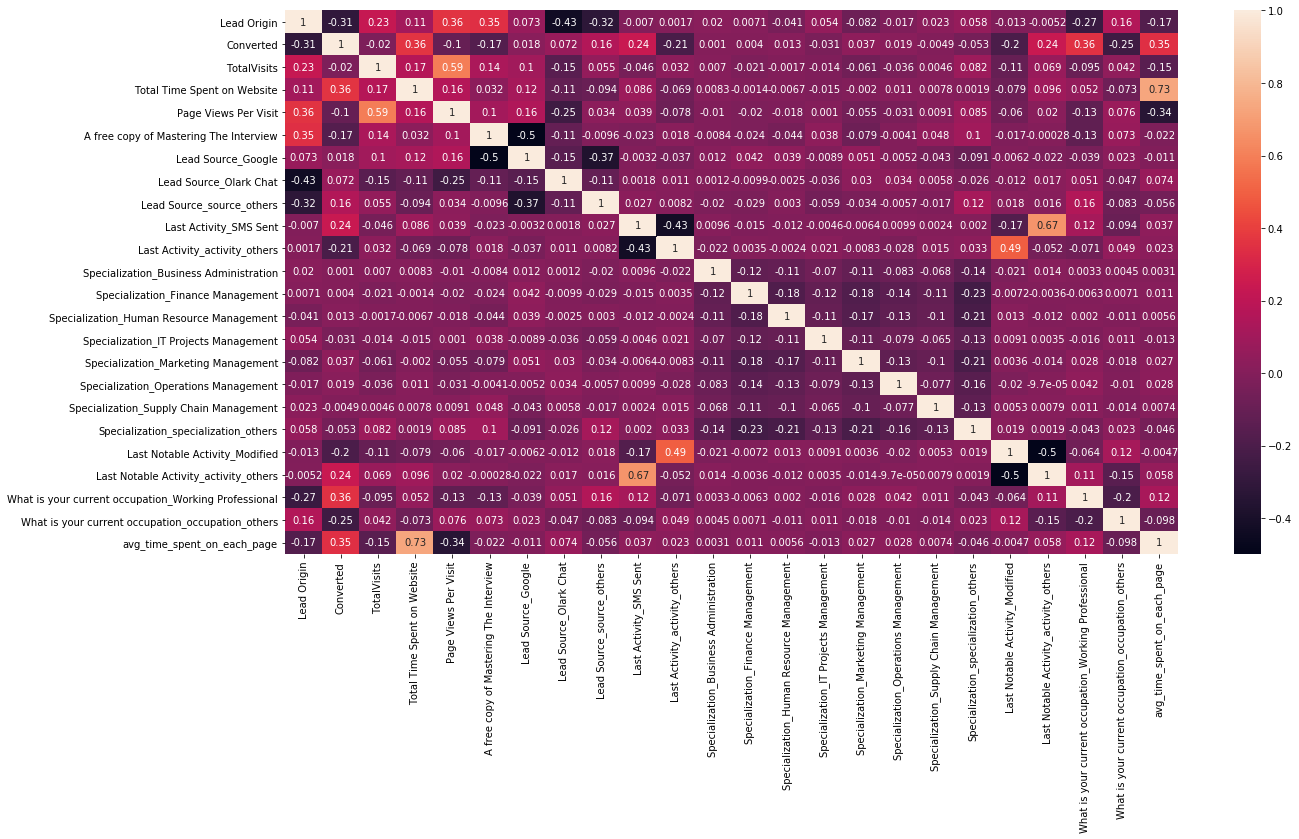

In [90]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

### As we can see from the above heatmap, there are no variables with very high corelation and hence we need not drop any features

###  Model Building

#### Running Your First Training Model

In [91]:
import statsmodels.api as sm

In [92]:
X_train.columns

Index(['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_source_others', 'Last Activity_SMS Sent',
       'Last Activity_activity_others',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_specialization_others',
       'Last Notable Activity_Modified',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others',
       'avg_time_spent_on_each_page'],
      dtype='object')

In [93]:
round(100*(X_train.isnull().sum()/len(X_train.index)), 2)

Lead Origin                                             0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
A free copy of Mastering The Interview                  0.0
Lead Source_Google                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_source_others                               0.0
Last Activity_SMS Sent                                  0.0
Last Activity_activity_others                           0.0
Specialization_Business Administration                  0.0
Specialization_Finance Management                       0.0
Specialization_Human Resource Management                0.0
Specialization_IT Projects Management                   0.0
Specialization_Marketing Management                     0.0
Specialization_Operations Management                    0.0
Specialization_Supply Chain Management  

In [94]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4078
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1811.7
Date:                Mon, 07 Sep 2020   Deviance:                       3623.5
Time:                        19:50:39   Pearson chi2:                 4.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1461      0.238      4.822      0.000       0.680       1.612
Lead Origin                                             -1.6977      0.154    -11.027      0.000      -1.999      -1.396
TotalVisits                                              0.1859      0.052      3.592      0.000       0.084       0.287
Total Time Spent on Website                              1.0206      0.087     11.768      0.000       0.851       1.191
Page Views Per Visit                                    -0.3325      0.070     -4.739      0.000      -0.470      -0.195
A free copy of Mastering The Interview                  -0.3768      0.108     -3.475      0.001      -0.589      -0.164
Lead Source_Google                                       0.0956      0.122      0.785      0.432      -0.143       0.334
Lead Source_Olark Chat                                  -0.3143      0.247     -1.270      0.204      -0.799       0.171
Lead Source_source_others                                0.6895      0.130      5.324      0.000       0.436       0.943
Last Activity_SMS Sent                                   0.0003      0.199      0.002      0.999      -0.390       0.391
Last Activity_activity_others                           -1.2774      0.188     -6.795      0.000      -1.646      -0.909
Specialization_Business Administration                  -0.2212      0.230     -0.962      0.336      -0.672       0.230
Specialization_Finance Management                       -0.1314      0.194     -0.676      0.499      -0.513       0.250
Specialization_Human Resource Management                -0.2127      0.199     -1.072      0.284      -0.602       0.176
Specialization_IT Projects Management                   -0.1757      0.235     -0.749      0.454      -0.636       0.284
Specialization_Marketing Management                     -0.0938      0.199     -0.471      0.637      -0.484       0.296
Specialization_Operations Management                    -0.0772      0.218     -0.354      0.723      -0.505       0.350
Specialization_Supply Chain Management                  -0.1957      0.238     -0.824      0.410      -0.661       0.270
Specialization_specialization_others                    -0.3940      0.190     -2.069      0.039      -0.767      -0.021
Last Notable Activity_Modified                           0.0192      0.170      0.113      0.910      -0.314       0.353
Last Notable Activity_activity_others                    1.1098      0.213      5.221      0.000       0.693       1.526
What is your current occupation_Working Professional     2.5833      0.205     12.604      0.000       2.182       2.985
What is your current occupation_occupation_others       -0

### Feature Selection Using RFE

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [96]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_source_others', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_activity_others', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', False, 2),
 ('Specialization_Supply Chain Management', True, 1),
 ('Specialization_specialization_others', True, 1),
 ('Last Notable Activity_Modified', False, 3),
 ('Last Notable Activity_activity_others', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('What is your current occ

In [99]:
col = X_train.columns[rfe.support_]

In [100]:
X_train.columns[~rfe.support_]

Index(['Specialization_Operations Management',
       'Last Notable Activity_Modified', 'avg_time_spent_on_each_page'],
      dtype='object')

##### Assessing the model with StatsModels

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()  
res.summary() 

### From the below description, "Last Activity_SMS Sent" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4081
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1811.8
Date:                Mon, 07 Sep 2020   Deviance:                       3623.6
Time:                        19:50:40   Pearson chi2:                 4.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1074      0.202      5.479      0.000       0.711       1.503
Lead Origin                                             -1.7009      0.153    -11.102      0.000      -2.001      -1.401
TotalVisits                                              0.1862      0.052      3.608      0.000       0.085       0.287
Total Time Spent on Website                              1.0271      0.046     22.538      0.000       0.938       1.116
Page Views Per Visit                                    -0.3356      0.056     -5.943      0.000      -0.446      -0.225
A free copy of Mastering The Interview                  -0.3779      0.108     -3.494      0.000      -0.590      -0.166
Lead Source_Google                                       0.0937      0.122      0.771      0.440      -0.144       0.332
Lead Source_Olark Chat                                  -0.3162      0.247     -1.280      0.201      -0.800       0.168
Lead Source_source_others                                0.6886      0.129      5.318      0.000       0.435       0.942
Last Activity_SMS Sent                                   0.0176      0.140      0.126      0.900      -0.257       0.292
Last Activity_activity_others                           -1.2595      0.122    -10.312      0.000      -1.499      -1.020
Specialization_Business Administration                  -0.1763      0.192     -0.919      0.358      -0.553       0.200
Specialization_Finance Management                       -0.0864      0.147     -0.586      0.558      -0.375       0.203
Specialization_Human Resource Management                -0.1677      0.153     -1.097      0.273      -0.467       0.132
Specialization_IT Projects Management                   -0.1306      0.197     -0.661      0.509      -0.518       0.257
Specialization_Marketing Management                     -0.0489      0.154     -0.319      0.750      -0.350       0.252
Specialization_Supply Chain Management                  -0.1505      0.201     -0.749      0.454      -0.544       0.243
Specialization_specialization_others                    -0.3494      0.142     -2.453      0.014      -0.629      -0.070
Last Notable Activity_activity_others                    1.0903      0.129      8.421      0.000       0.837       1.344
What is your current occupation_Working Professional     2.5824      0.205     12.600      0.000       2.181       2.984
What is your current occupation_occupation_others       -0.6593      0.101     -6.525      0.000      -0.857      -0.461
========================================================================================================================
"""

In [102]:
col

Index(['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_source_others', 'Last Activity_SMS Sent',
       'Last Activity_activity_others',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Supply Chain Management',
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others'],
      dtype='object')

In [103]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_source_others', 'Last Activity_activity_others',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Operations Management',       
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others',
       'avg_time_spent_on_each_page']
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

### From the below description, "avg_time_spent_on_each_page" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4082
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1812.1
Date:                Mon, 07 Sep 2020   Deviance:                       3624.2
Time:                        19:50:40   Pearson chi2:                 4.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0614      0.183      5.786      0.000       0.702       1.421
Lead Origin                                             -1.7012      0.154    -11.068      0.000      -2.002      -1.400
TotalVisits                                              0.1858      0.051      3.634      0.000       0.086       0.286
Total Time Spent on Website                              1.0204      0.087     11.768      0.000       0.850       1.190
Page Views Per Visit                                    -0.3307      0.070     -4.734      0.000      -0.468      -0.194
A free copy of Mastering The Interview                  -0.3791      0.108     -3.501      0.000      -0.591      -0.167
Lead Source_Google                                       0.0959      0.122      0.789      0.430      -0.142       0.334
Lead Source_Olark Chat                                  -0.3165      0.247     -1.280      0.200      -0.801       0.168
Lead Source_source_others                                0.6884      0.129      5.318      0.000       0.435       0.942
Last Activity_activity_others                           -1.2721      0.105    -12.140      0.000      -1.478      -1.067
Specialization_Business Administration                  -0.1268      0.178     -0.711      0.477      -0.476       0.223
Specialization_Finance Management                       -0.0368      0.129     -0.286      0.775      -0.289       0.216
Specialization_Human Resource Management                -0.1181      0.135     -0.875      0.382      -0.382       0.146
Specialization_IT Projects Management                   -0.0807      0.184     -0.438      0.661      -0.442       0.280
Specialization_Operations Management                     0.0175      0.163      0.108      0.914      -0.301       0.336
Specialization_specialization_others                    -0.2990      0.124     -2.418      0.016      -0.541      -0.057
Last Notable Activity_activity_others                    1.1036      0.088     12.554      0.000       0.931       1.276
What is your current occupation_Working Professional     2.5798      0.205     12.597      0.000       2.178       2.981
What is your current occupation_occupation_others       -0.6572      0.101     -6.514      0.000      -0.855      -0.459
avg_time_spent_on_each_page                              0.0088      0.092      0.096      0.923      -0.171       0.189
========================================================================================================================
"""

In [104]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_source_others', 'Last Activity_activity_others',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Operations Management',       
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others'
       ]
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

### From the below description, "Specialization_Operations Management" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4083
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1812.1
Date:                Mon, 07 Sep 2020   Deviance:                       3624.2
Time:                        19:50:40   Pearson chi2:                 4.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0619      0.183      5.791      0.000       0.703       1.421
Lead Origin                                             -1.7025      0.153    -11.121      0.000      -2.003      -1.402
TotalVisits                                              0.1855      0.051      3.634      0.000       0.085       0.286
Total Time Spent on Website                              1.0275      0.046     22.551      0.000       0.938       1.117
Page Views Per Visit                                    -0.3347      0.056     -5.948      0.000      -0.445      -0.224
A free copy of Mastering The Interview                  -0.3786      0.108     -3.501      0.000      -0.591      -0.167
Lead Source_Google                                       0.0953      0.121      0.785      0.432      -0.143       0.333
Lead Source_Olark Chat                                  -0.3156      0.247     -1.278      0.201      -0.800       0.168
Lead Source_source_others                                0.6886      0.129      5.319      0.000       0.435       0.942
Last Activity_activity_others                           -1.2708      0.104    -12.244      0.000      -1.474      -1.067
Specialization_Business Administration                  -0.1271      0.178     -0.713      0.476      -0.477       0.222
Specialization_Finance Management                       -0.0369      0.129     -0.287      0.774      -0.289       0.215
Specialization_Human Resource Management                -0.1181      0.135     -0.876      0.381      -0.383       0.146
Specialization_IT Projects Management                   -0.0806      0.184     -0.438      0.662      -0.442       0.280
Specialization_Operations Management                     0.0176      0.163      0.109      0.914      -0.301       0.336
Specialization_specialization_others                    -0.2990      0.124     -2.418      0.016      -0.541      -0.057
Last Notable Activity_activity_others                    1.1033      0.088     12.557      0.000       0.931       1.276
What is your current occupation_Working Professional     2.5801      0.205     12.599      0.000       2.179       2.981
What is your current occupation_occupation_others       -0.6571      0.101     -6.513      0.000      -0.855      -0.459
========================================================================================================================
"""

In [105]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_source_others', 'Last Activity_activity_others',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',          
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others']
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


### From the below description, "Specialization_Finance Management" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4084
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1812.1
Date:                Mon, 07 Sep 2020   Deviance:                       3624.2
Time:                        19:50:40   Pearson chi2:                 4.24e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0654      0.181      5.900      0.000       0.711       1.419
Lead Origin                                             -1.7017      0.153    -11.128      0.000      -2.001      -1.402
TotalVisits                                              0.1854      0.051      3.633      0.000       0.085       0.286
Total Time Spent on Website                              1.0275      0.046     22.552      0.000       0.938       1.117
Page Views Per Visit                                    -0.3348      0.056     -5.950      0.000      -0.445      -0.225
A free copy of Mastering The Interview                  -0.3783      0.108     -3.499      0.000      -0.590      -0.166
Lead Source_Google                                       0.0954      0.121      0.787      0.432      -0.142       0.333
Lead Source_Olark Chat                                  -0.3149      0.247     -1.276      0.202      -0.799       0.169
Lead Source_source_others                                0.6889      0.129      5.323      0.000       0.435       0.943
Last Activity_activity_others                           -1.2711      0.104    -12.254      0.000      -1.474      -1.068
Specialization_Business Administration                  -0.1314      0.174     -0.756      0.449      -0.472       0.209
Specialization_Finance Management                       -0.0412      0.122     -0.336      0.737      -0.281       0.199
Specialization_Human Resource Management                -0.1224      0.129     -0.949      0.343      -0.375       0.130
Specialization_IT Projects Management                   -0.0849      0.180     -0.472      0.637      -0.437       0.267
Specialization_specialization_others                    -0.3034      0.117     -2.593      0.010      -0.533      -0.074
Last Notable Activity_activity_others                    1.1033      0.088     12.557      0.000       0.931       1.276
What is your current occupation_Working Professional     2.5803      0.205     12.602      0.000       2.179       2.982
What is your current occupation_occupation_others       -0.6572      0.101     -6.514      0.000      -0.855      -0.459
========================================================================================================================
"""

In [106]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_source_others', 'Last Activity_activity_others',
       'Specialization_Business Administration',       
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',          
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others']
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

### From the below description, "Specialization_IT Projects Management" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4085
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1812.2
Date:                Mon, 07 Sep 2020   Deviance:                       3624.3
Time:                        19:50:41   Pearson chi2:                 4.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0544      0.178      5.937      0.000       0.706       1.403
Lead Origin                                             -1.7029      0.153    -11.139      0.000      -2.002      -1.403
TotalVisits                                              0.1858      0.051      3.639      0.000       0.086       0.286
Total Time Spent on Website                              1.0276      0.046     22.552      0.000       0.938       1.117
Page Views Per Visit                                    -0.3346      0.056     -5.946      0.000      -0.445      -0.224
A free copy of Mastering The Interview                  -0.3791      0.108     -3.508      0.000      -0.591      -0.167
Lead Source_Google                                       0.0935      0.121      0.771      0.440      -0.144       0.331
Lead Source_Olark Chat                                  -0.3137      0.247     -1.271      0.204      -0.797       0.170
Lead Source_source_others                                0.6883      0.129      5.319      0.000       0.435       0.942
Last Activity_activity_others                           -1.2714      0.104    -12.255      0.000      -1.475      -1.068
Specialization_Business Administration                  -0.1180      0.169     -0.698      0.485      -0.450       0.213
Specialization_Human Resource Management                -0.1090      0.123     -0.888      0.374      -0.350       0.132
Specialization_IT Projects Management                   -0.0713      0.175     -0.407      0.684      -0.415       0.272
Specialization_specialization_others                    -0.2900      0.110     -2.634      0.008      -0.506      -0.074
Last Notable Activity_activity_others                    1.1030      0.088     12.555      0.000       0.931       1.275
What is your current occupation_Working Professional     2.5799      0.205     12.603      0.000       2.179       2.981
What is your current occupation_occupation_others       -0.6578      0.101     -6.522      0.000      -0.856      -0.460
========================================================================================================================
"""

In [107]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_source_others', 'Last Activity_activity_others',
       'Specialization_Business Administration',       
       'Specialization_Human Resource Management',                
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others']
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

### From the below description, "Specialization_IT Projects Management" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4086
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1812.3
Date:                Mon, 07 Sep 2020   Deviance:                       3624.5
Time:                        19:50:41   Pearson chi2:                 4.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0478      0.177      5.925      0.000       0.701       1.394
Lead Origin                                             -1.7032      0.153    -11.140      0.000      -2.003      -1.404
TotalVisits                                              0.1860      0.051      3.643      0.000       0.086       0.286
Total Time Spent on Website                              1.0280      0.046     22.567      0.000       0.939       1.117
Page Views Per Visit                                    -0.3346      0.056     -5.946      0.000      -0.445      -0.224
A free copy of Mastering The Interview                  -0.3806      0.108     -3.524      0.000      -0.592      -0.169
Lead Source_Google                                       0.0930      0.121      0.768      0.443      -0.144       0.331
Lead Source_Olark Chat                                  -0.3097      0.247     -1.256      0.209      -0.793       0.174
Lead Source_source_others                                0.6896      0.129      5.331      0.000       0.436       0.943
Last Activity_activity_others                           -1.2717      0.104    -12.260      0.000      -1.475      -1.068
Specialization_Business Administration                  -0.1104      0.168     -0.657      0.511      -0.440       0.219
Specialization_Human Resource Management                -0.1015      0.121     -0.836      0.403      -0.339       0.136
Specialization_specialization_others                    -0.2824      0.109     -2.602      0.009      -0.495      -0.070
Last Notable Activity_activity_others                    1.1017      0.088     12.549      0.000       0.930       1.274
What is your current occupation_Working Professional     2.5810      0.205     12.606      0.000       2.180       2.982
What is your current occupation_occupation_others       -0.6572      0.101     -6.517      0.000      -0.855      -0.460
========================================================================================================================
"""

In [108]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_source_others', 'Last Activity_activity_others',        
       'Specialization_Human Resource Management',      
       'Specialization_Operations Management',       
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others']
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

### From the below description, "Specialization_Operations Management" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4087
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1813.2
Date:                Mon, 07 Sep 2020   Deviance:                       3626.4
Time:                        19:50:41   Pearson chi2:                 4.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9143      0.150      6.107      0.000       0.621       1.208
Lead Origin                                             -1.6169      0.134    -12.023      0.000      -1.880      -1.353
TotalVisits                                              0.1841      0.051      3.608      0.000       0.084       0.284
Total Time Spent on Website                              1.0305      0.046     22.635      0.000       0.941       1.120
Page Views Per Visit                                    -0.3323      0.056     -5.915      0.000      -0.442      -0.222
A free copy of Mastering The Interview                  -0.3697      0.108     -3.434      0.001      -0.581      -0.159
Lead Source_Google                                       0.1321      0.117      1.127      0.260      -0.098       0.362
Lead Source_source_others                                0.7461      0.121      6.189      0.000       0.510       0.982
Last Activity_activity_others                           -1.2652      0.104    -12.219      0.000      -1.468      -1.062
Specialization_Human Resource Management                -0.0846      0.122     -0.696      0.486      -0.323       0.154
Specialization_Operations Management                     0.0474      0.152      0.312      0.755      -0.250       0.345
Specialization_specialization_others                    -0.2696      0.109     -2.477      0.013      -0.483      -0.056
Last Notable Activity_activity_others                    1.1006      0.088     12.532      0.000       0.929       1.273
What is your current occupation_Working Professional     2.5780      0.205     12.596      0.000       2.177       2.979
What is your current occupation_occupation_others       -0.6590      0.101     -6.534      0.000      -0.857      -0.461
========================================================================================================================
"""

In [109]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_source_others', 'Last Activity_activity_others',        
       'Specialization_Human Resource Management',             
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others']
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

### From the below description, "Specialization_Human Resource Managemen" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4088
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1813.3
Date:                Mon, 07 Sep 2020   Deviance:                       3626.5
Time:                        19:50:41   Pearson chi2:                 4.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9200      0.149      6.192      0.000       0.629       1.211
Lead Origin                                             -1.6160      0.134    -12.022      0.000      -1.879      -1.353
TotalVisits                                              0.1840      0.051      3.605      0.000       0.084       0.284
Total Time Spent on Website                              1.0306      0.046     22.639      0.000       0.941       1.120
Page Views Per Visit                                    -0.3324      0.056     -5.917      0.000      -0.442      -0.222
A free copy of Mastering The Interview                  -0.3693      0.108     -3.430      0.001      -0.580      -0.158
Lead Source_Google                                       0.1317      0.117      1.123      0.261      -0.098       0.361
Lead Source_source_others                                0.7464      0.121      6.192      0.000       0.510       0.983
Last Activity_activity_others                           -1.2662      0.104    -12.234      0.000      -1.469      -1.063
Specialization_Human Resource Management                -0.0908      0.120     -0.757      0.449      -0.326       0.144
Specialization_specialization_others                    -0.2759      0.107     -2.580      0.010      -0.486      -0.066
Last Notable Activity_activity_others                    1.1004      0.088     12.531      0.000       0.928       1.272
What is your current occupation_Working Professional     2.5787      0.205     12.604      0.000       2.178       2.980
What is your current occupation_occupation_others       -0.6594      0.101     -6.539      0.000      -0.857      -0.462
========================================================================================================================
"""

In [110]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_source_others', 'Last Activity_activity_others',                    
       'Specialization_specialization_others',
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others']
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

### From the below description, "Specialization_Operations Management" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4089
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1813.6
Date:                Mon, 07 Sep 2020   Deviance:                       3627.1
Time:                        19:50:41   Pearson chi2:                 4.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9039      0.147      6.150      0.000       0.616       1.192
Lead Origin                                             -1.6146      0.134    -12.017      0.000      -1.878      -1.351
TotalVisits                                              0.1827      0.051      3.582      0.000       0.083       0.283
Total Time Spent on Website                              1.0298      0.045     22.638      0.000       0.941       1.119
Page Views Per Visit                                    -0.3314      0.056     -5.902      0.000      -0.441      -0.221
A free copy of Mastering The Interview                  -0.3695      0.108     -3.433      0.001      -0.580      -0.159
Lead Source_Google                                       0.1287      0.117      1.099      0.272      -0.101       0.358
Lead Source_source_others                                0.7421      0.120      6.165      0.000       0.506       0.978
Last Activity_activity_others                           -1.2660      0.103    -12.232      0.000      -1.469      -1.063
Specialization_specialization_others                    -0.2589      0.105     -2.476      0.013      -0.464      -0.054
Last Notable Activity_activity_others                    1.1012      0.088     12.545      0.000       0.929       1.273
What is your current occupation_Working Professional     2.5797      0.205     12.603      0.000       2.179       2.981
What is your current occupation_occupation_others       -0.6594      0.101     -6.541      0.000      -0.857      -0.462
========================================================================================================================
"""

In [111]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_source_others', 'Last Activity_activity_others',      
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others']
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()


### From the below description, "Lead Source_Google" has p value more than 0.05 and 
### hence has no significant relationship with the target variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4090
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1816.6
Date:                Mon, 07 Sep 2020   Deviance:                       3633.3
Time:                        19:50:42   Pearson chi2:                 4.22e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8729      0.146      5.966      0.000       0.586       1.160
Lead Origin                                             -1.6243      0.134    -12.086      0.000      -1.888      -1.361
TotalVisits                                              0.1797      0.051      3.528      0.000       0.080       0.280
Total Time Spent on Website                              1.0294      0.045     22.645      0.000       0.940       1.118
Page Views Per Visit                                    -0.3343      0.056     -5.961      0.000      -0.444      -0.224
A free copy of Mastering The Interview                  -0.3803      0.107     -3.542      0.000      -0.591      -0.170
Lead Source_Google                                       0.1356      0.117      1.160      0.246      -0.093       0.365
Lead Source_source_others                                0.7067      0.119      5.927      0.000       0.473       0.940
Last Activity_activity_others                           -1.2725      0.103    -12.310      0.000      -1.475      -1.070
Last Notable Activity_activity_others                    1.0963      0.088     12.511      0.000       0.925       1.268
What is your current occupation_Working Professional     2.5839      0.205     12.635      0.000       2.183       2.985
What is your current occupation_occupation_others       -0.6629      0.101     -6.579      0.000      -0.860      -0.465
========================================================================================================================
"""

In [112]:
col=['Lead Origin', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
        'Lead Source_source_others', 'Last Activity_activity_others',      
       'Last Notable Activity_activity_others',
       'What is your current occupation_Working Professional',
       'What is your current occupation_occupation_others']
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

### THIS IS THE FINAL MODEL AS ALL P VALUES ARE 0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4091
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1817.3
Date:                Mon, 07 Sep 2020   Deviance:                       3634.6
Time:                        19:50:42   Pearson chi2:                 4.22e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9570      0.127      7.527      0.000       0.708       1.206
Lead Origin                                             -1.6123      0.134    -12.049      0.000      -1.875      -1.350
TotalVisits                                              0.1853      0.051      3.658      0.000       0.086       0.285
Total Time Spent on Website                              1.0326      0.045     22.758      0.000       0.944       1.122
Page Views Per Visit                                    -0.3246      0.055     -5.860      0.000      -0.433      -0.216
A free copy of Mastering The Interview                  -0.4514      0.088     -5.125      0.000      -0.624      -0.279
Lead Source_source_others                                0.6520      0.109      5.957      0.000       0.437       0.866
Last Activity_activity_others                           -1.2733      0.103    -12.319      0.000      -1.476      -1.071
Last Notable Activity_activity_others                    1.0930      0.088     12.486      0.000       0.921       1.265
What is your current occupation_Working Professional     2.5828      0.205     12.625      0.000       2.182       2.984
What is your current occupation_occupation_others       -0.6642      0.101     -6.592      0.000      -0.862      -0.467
========================================================================================================================
"""

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin,3.29
4,A free copy of Mastering The Interview,2.27
3,Page Views Per Visit,1.69
1,TotalVisits,1.61
7,Last Notable Activity_activity_others,1.50
9,What is your current occupation_occupation_others,1.40
6,Last Activity_activity_others,1.35
5,Lead Source_source_others,1.25
8,What is your current occupation_Working Profes...,1.19
2,Total Time Spent on Website,1.08


In [115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6529    0.954763
2509    0.651521
4265    0.074926
4872    0.160094
3909    0.363310
6228    0.182167
7298    0.155441
1022    0.830589
7398    0.181061
9076    0.974349
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.95476292, 0.65152085, 0.0749258 , 0.16009411, 0.36330954,
       0.18216686, 0.15544098, 0.83058891, 0.18106101, 0.97434941])

##### Creating a dataframe with the actual coverted flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,CustID
0,1.0,0.954763,6529
1,1.0,0.651521,2509
2,0.0,0.074926,4265
3,1.0,0.160094,4872
4,1.0,0.363310,3909


###  Plotting the ROC Curve

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

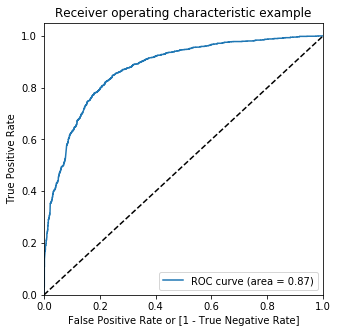

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### Finding Optimal Cutoff Point

In [121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.954763,6529,1,1,1,1,1,1,1,1,1,1
1,1.0,0.651521,2509,1,1,1,1,1,1,1,0,0,0
2,0.0,0.074926,4265,1,0,0,0,0,0,0,0,0,0
3,1.0,0.160094,4872,1,1,0,0,0,0,0,0,0,0
4,1.0,0.363310,3909,1,1,1,1,0,0,0,0,0,0


In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.439298  1.000000  0.000000
0.1   0.1  0.594832  0.978357  0.294348
0.2   0.2  0.726231  0.932852  0.564348
0.3   0.3  0.773769  0.879023  0.691304
0.4   0.4  0.796197  0.814650  0.781739
0.5   0.5  0.800829  0.744173  0.845217
0.6   0.6  0.782301  0.640400  0.893478
0.7   0.7  0.744759  0.509434  0.929130
0.8   0.8  0.719161  0.412320  0.959565
0.9   0.9  0.669430  0.265261  0.986087


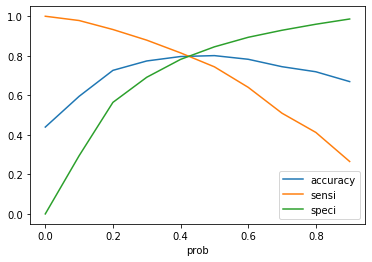

In [123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.52 is the optimum point to take it as a cutoff probability TO MEET THE CRITERIA MENTIONED IN PROBLEM STATEMENT

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x >= 0.52 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.954763,6529,1,1,1,1,1,1,1,1,1,1,1
1,1.0,0.651521,2509,1,1,1,1,1,1,1,0,0,0,1
2,0.0,0.074926,4265,1,0,0,0,0,0,0,0,0,0,0
3,1.0,0.160094,4872,1,1,0,0,0,0,0,0,0,0,0
4,1.0,0.363310,3909,1,1,1,1,0,0,0,0,0,0,0


In [125]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.8

### 80% Accurate Model

#### Calculating "Lead_Score_for_training_set"

In [126]:
y_train_pred_final["Lead_Score_for_training_set"]=y_train_pred_final["Convert_Prob"].apply(lambda x: x*100)
y_train_pred_final.head()

,Converted,Convert_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score_for_training_set
0,1.0,0.954763,6529,1,1,1,1,1,1,1,1,1,1,1,95.476292
1,1.0,0.651521,2509,1,1,1,1,1,1,1,0,0,0,1,65.152085
2,0.0,0.074926,4265,1,0,0,0,0,0,0,0,0,0,0,7.492580
3,1.0,0.160094,4872,1,1,0,0,0,0,0,0,0,0,0,16.009411
4,1.0,0.363310,3909,1,1,1,1,0,0,0,0,0,0,0,36.330954


In [127]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1965,  335],
       [ 492, 1310]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
round((TP / float(TP+FN)),2)

0.73

In [130]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.85

In [131]:
# Calculate false postive rate - predicting churn when customer does not have churned
round((FP/ float(TN+FP)),2)

0.15

In [132]:
# Positive predictive value 
round( TP / float(TP+FP),2)

0.8

## Here, we could see in the immediately above described cell, the lead conversion rate (Precision) is above 80%- Fulfilling the ballpark of the target given by CEO

In [133]:
# Negative predictive value
round( TN / float(TN+ FN),2)

0.8

## Precision and Recall

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[1965,  335],
       [ 492, 1310]], dtype=int64)

##### Precision
TP / TP + FP

In [135]:
round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2)

0.8

##### Recall
TP / TP + FN

In [136]:
round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2)

0.73

### Precision and recall tradeoff

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

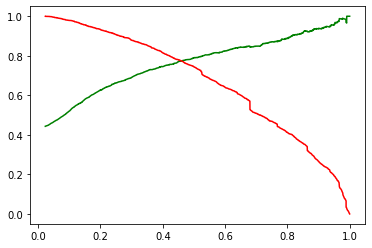

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [140]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','avg_time_spent_on_each_page']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','avg_time_spent_on_each_page']])

In [141]:
X_test = X_test[col]
X_test.head()

,Lead Origin,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_source_others,Last Activity_activity_others,Last Notable Activity_activity_others,What is your current occupation_Working Professional,What is your current occupation_occupation_others
7412,1,-0.681864,0.535864,-0.512317,1,0,0,0,1,0
1749,1,-0.681864,1.078208,-1.028330,0,0,1,0,0,1
7782,1,-0.376372,-0.428709,0.003696,1,0,1,1,0,0
7751,1,-0.376372,-0.215775,0.003696,0,0,1,0,0,0
8638,1,-0.070880,-0.827278,0.519709,0,0,1,0,0,0


In [142]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [143]:
y_test_pred = res.predict(X_test_sm)

In [144]:
y_test_pred[:10]

7412    0.887902
1749    0.218934
7782    0.141784
7751    0.097767
8638    0.049050
3517    0.199021
1973    0.924548
7601    0.309269
1742    0.155932
8259    0.178539
dtype: float64

In [145]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [146]:
# Let's see the head
y_pred_1.head()

,0
7412,0.887902
1749,0.218934
7782,0.141784
7751,0.097767
8638,0.049050


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

,Converted,CustID,0
0,1.0,7412,0.887902
1,0.0,1749,0.218934
2,0.0,7782,0.141784
3,0.0,7751,0.097767
4,1.0,8638,0.049050


In [152]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [153]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Converted','Convert_Prob']]

In [154]:
y_pred_final.head()

,CustID,Converted,Convert_Prob
0,7412,1.0,0.887902
1,1749,0.0,0.218934
2,7782,0.0,0.141784
3,7751,0.0,0.097767
4,8638,1.0,0.049050


In [155]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x >= 0.52 else 0)

In [156]:
y_pred_final.head()

,CustID,Converted,Convert_Prob,final_predicted
0,7412,1.0,0.887902,1
1,1749,0.0,0.218934,0
2,7782,0.0,0.141784,0
3,7751,0.0,0.097767,0
4,8638,1.0,0.049050,0


In [157]:
y_pred_final["Lead_Score_for_test_set"]=y_pred_final["Convert_Prob"].apply(lambda x: x*100)
y_pred_final.head()

,CustID,Converted,Convert_Prob,final_predicted,Lead_Score_for_test_set
0,7412,1.0,0.887902,1,88.790178
1,1749,0.0,0.218934,0,21.893433
2,7782,0.0,0.141784,0,14.178357
3,7751,0.0,0.097767,0,9.776663
4,8638,1.0,0.049050,0,4.904962


In [158]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.8

### Accuracy of our model for test set is 80%

In [159]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[824, 144],
       [211, 579]], dtype=int64)

In [160]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)

0.73

In [162]:
# Let us calculate specificity
round(TN / float(TN+FP),2)

0.85

In [163]:
# calculating TPR or Precision = = TP / (TP + FP)
round(confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]),2)

0.8

### We can see from the above cell that lead conversion rate as per the final model for our TEST SET came out to be  80% - fulfilling the objective in the problem statement

In [164]:
# Calculating Recall = TP / (TP + FN)
round(confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]),2)

0.73

In [165]:
round(TN/(TN+FN),2)

0.8

## Hence, the final logit equation comes out to be-


### log(odds(converted))= 0.96  -  1.61*(Lead Origin)  +  0.19*(TotalVisits)  +  1.03*(Total Time Spent on Website)   - 

### 0.32*(Page Views Per Visit)  - 0.45* (A free copy of Mastering The Interview) + 0.65 *(Lead  Source_source_others)  - 1.27 *(Last Activity_activity_others)  +   1.09*(Last Notable Activity_activity_others) + 

### 2.6*(What is your current occupation_Working Professional) - 0.66*(What is your current occupation_occupation_others)





# As per the above final model, Hot Leads can be defined as the customers who have log(odds(converted)) value ie. probability greater than our cut-off point i.e 0.52

# We can also say that customers having Lead Score greater than or equal to 52 are Hot Leads.

# Since the Precision value of our model for test data is above 80%, IF WE take all the Hot Leads and the sales team attempts to approach them through various engagement channels, then it will be able to convert atleast 80% of the Hot Leads into actual sales.

